In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
from scipy.ndimage import gaussian_filter1d
import matplotlib.ticker as ticker

# Set display options
pd.set_option("display.max_columns", None)

# Set matplotlib inline mode
plt.rcParams["figure.figsize"] = (8, 5)
%matplotlib inline

# Define function for custom tick formatting
def millions(x, pos):
    return "%1.1fK" % (x * 1e-3)

# Define function for formatting axis ticks to K notation
formatter = ticker.FuncFormatter(millions)


1 BL1
2 BL1
3 BL1


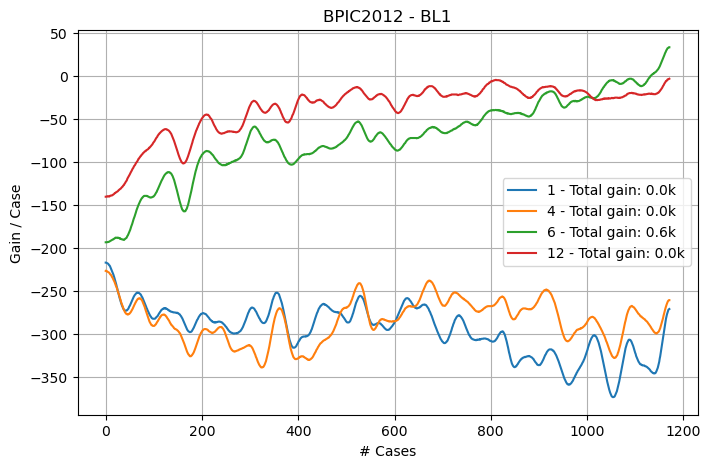

1 BL1
2 BL1
3 BL1


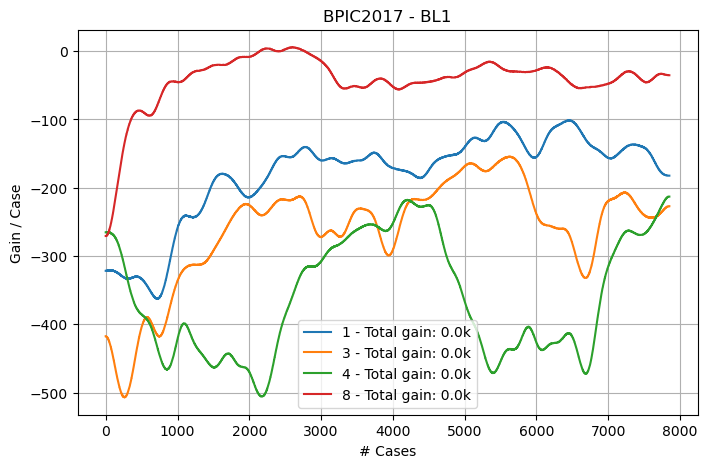

1 BL1
2 BL1
3 BL1


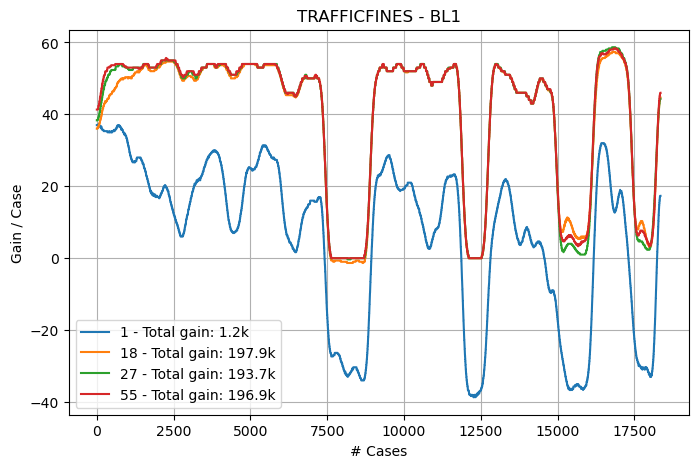

1 BL2
2 BL2
3 BL2


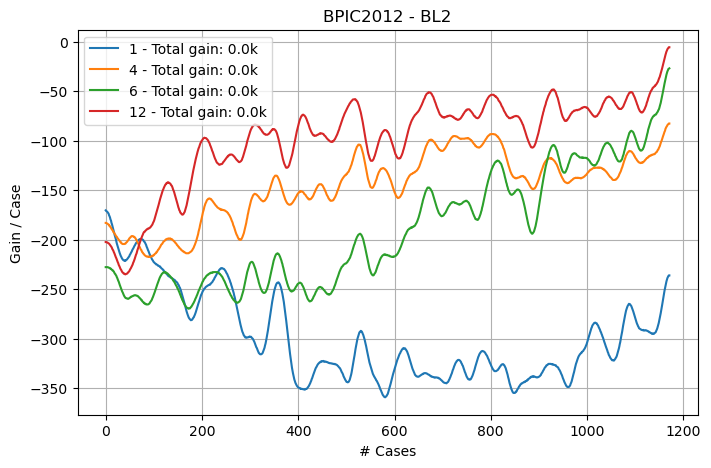

1 BL2
2 BL2
3 BL2


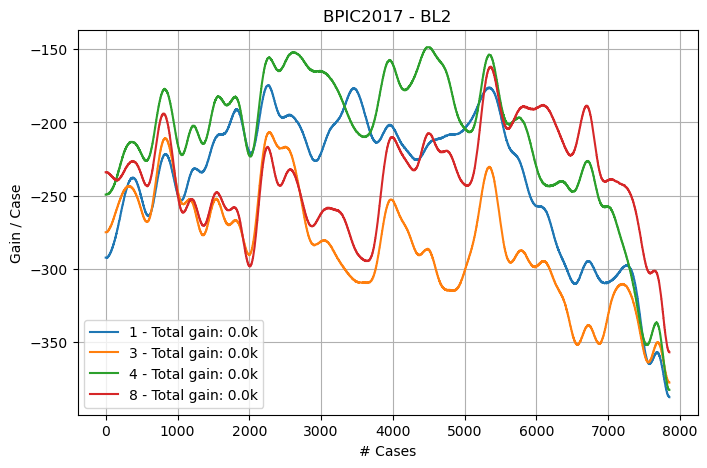

1 BL2
2 BL2
3 BL2


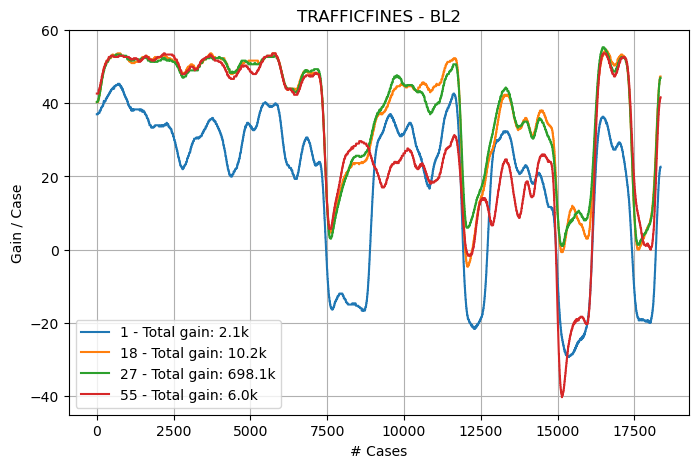

1 ours
2 ours
3 ours


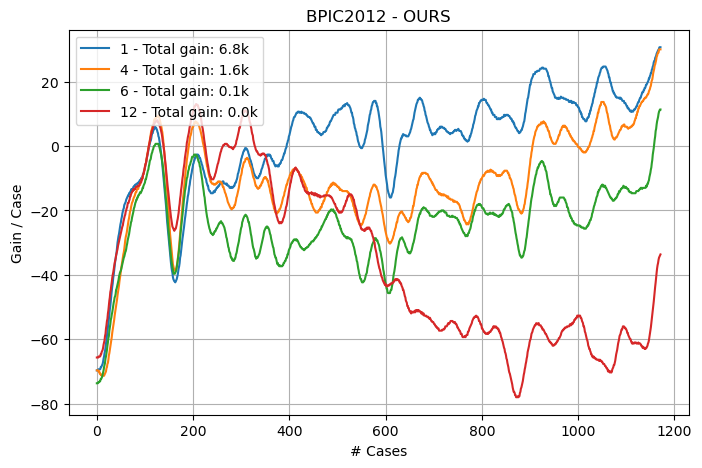

1 ours
2 ours
3 ours


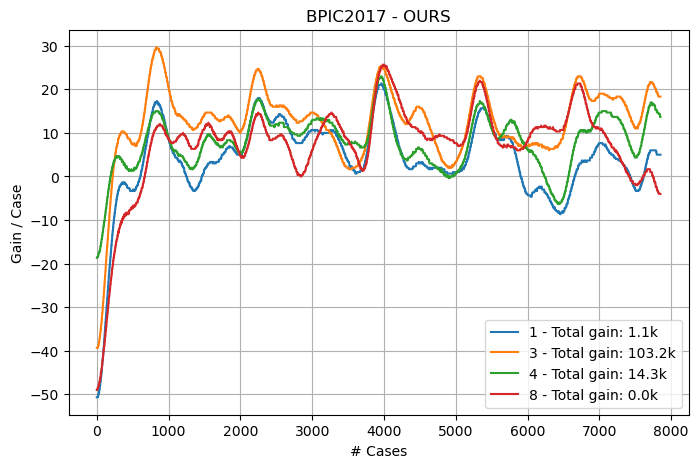

1 ours
2 ours
3 ours


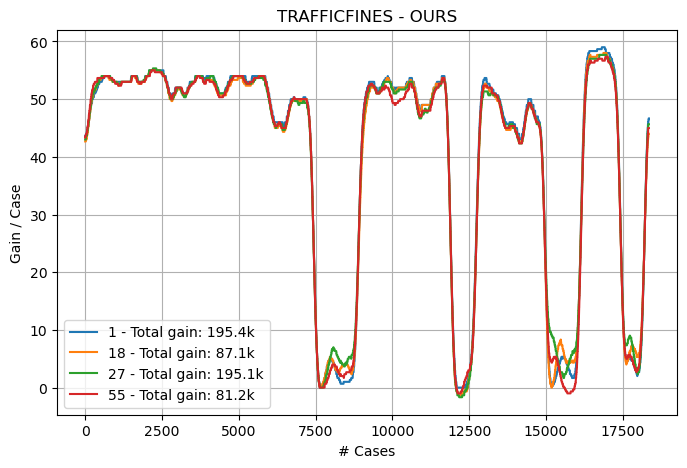

In [41]:
import os

def find_convergence(arr):
    convergence_point = None
    for i, value in enumerate(arr):
        if value > 0:
            if all(v > 0 for v in arr[i:]):
                convergence_point = i
                break
    return convergence_point

# Define modes and their aliases
modes_map = {"Zahra": "BL1", "Metzger": "BL2", "Mahmoud": "ours"}

# Define iterations and datasets
iterations = [1, 2, 3]
datasets = ["bpic2012", "bpic2017", "trafficFines"]

dfs_dict = {}  # {it: [dfs]}
gains_dict = {}

convergence_dict_comp = {}
average_values = {}
sorted_keys_comp = {}

# Iterate over modes, datasets, and iterations
for mode, mode_alias in modes_map.items():
    convergence_dict_comp[mode] = {}
    # average_values[mode] = {}
    for dataset_name in datasets:  
        average_values[(dataset_name, mode)] = {}
        if dataset_name == "bpic2012":
            sig = 12
        else:
            sig = 100   
        
        gains_dict = {}
        dfs_dict = {}
        for it in iterations:    
            gains_dict[it] = {}
            dfs_dict[it] = []
            print(it, mode_alias)
            # final_results_v2 -  final_results (bls: 0, ours: 10) - resultsRevisionGainRes_0 - resultsRevisionGainRes_10
            path = f"/home/mshoush/5th/RL-prescriptive-monitoring/resultsRevision_from_vm_v2/final_results_v2/{dataset_name}/{dataset_name}/resultsRL/all/{mode_alias}{it}/"
            
            # Retrieve all CSV files from subfolders within the path
            csv_files = []
            for root, dirs, files in os.walk(path):
                for file in files:
                    if file.endswith(".csv"):
                        csv_files.append(os.path.join(root, file))
        
                        
            
            # Print the list of CSV files
            for f in csv_files:
                df = pd.read_csv(f, sep=";")
                df.name = os.path.basename(f).split("_")[2]
                dfs_dict[it].append((df.name , df))
                gains_dict[it][df.name] = []

        
        for k, v in dfs_dict.items():
            it = k
            for df_name, df in v:
                
                gains_dict[it][df_name].append(gaussian_filter1d(df.gain, sigma=sig))
        combined_dict = {}

        for k, v in gains_dict.items():
            for key, value in v.items():
                combined_dict.setdefault(key, []).extend(value)
        
        gains = {}
        sum_gaines = {}
        avg_gaines = {}
        for k, v in combined_dict.items():
            gains[k] = np.mean(v, axis=0)
            sum_gaines[k] = sum(gains[k])
            avg_gaines[k] = np.mean(gains[k])
            
        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)
    
        
        # Convert keys to integers and sort them
        sorted_keys = sorted(gains.keys(), key=lambda x: int(x))
        sorted_keys_comp[dataset_name]=sorted_keys
        
        
        # Create a new dictionary with sorted keys
        gains = {k: gains[k] for k in sorted_keys}



        for k, arr in gains.items():
            convergence_dict_comp[mode][k] = []

            convergence_index = find_convergence(arr)
            if convergence_index is None:
                # print(f"Array {k} does not converge")
                convergence_dict_comp[mode][k].append([0, 0])
                sum_after_convergence = 0

            else:
                # print(f"Array {k} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(arr[convergence_index:])
                #print(f"Sum after convergence: {sum_after_convergence}")
                convergence_dict_comp[mode][k].append(
                    [convergence_index, sum_after_convergence]
                )
            # print(" Total gain: {:.1f}k\n".format(sum_after_convergence / 1000))
            plt.plot(
                    arr,
                    label= str(k)
                    + " - Total gain: {:.1f}k".format(sum_after_convergence / 1000),
                )

        from matplotlib.ticker import FuncFormatter

        formatter = FuncFormatter(millions)
        plt.grid(True)
        plt.legend(loc="best")
        plt.ylabel("Gain / Case")
        plt.xlabel("# Cases")
        if dataset_name=="traficFines":
            d = "trafficFines"
            plt.title(f"{d.upper()} - {mode_alias.upper()}")
        else:
            plt.title(f"{dataset_name.upper()} - {mode_alias.upper()}")
        plt.show()
        average_values[(dataset_name, mode)]=gains
        # fig, axs = plt.subplots(nrows=len(average_values[mode]), ncols=1, figsize=(10, 6))
        # sorted_resource_levels = sorted_keys


  

In [42]:
sorted_keys_comp

{'bpic2012': ['1', '4', '6', '12'],
 'bpic2017': ['1', '3', '4', '8'],
 'trafficFines': ['1', '18', '27', '55']}

In [40]:
average_values[("bpic2017", "Mahmoud")]

{'1': array([-50.66666667, -50.66666667, -50.66666667, ...,   5.        ,
          5.        ,   5.        ]),
 '3': array([-39.33333333, -39.33333333, -39.33333333, ...,  18.33333333,
         18.33333333,  18.33333333]),
 '4': array([-18.66666667, -18.66666667, -18.66666667, ...,  13.66666667,
         13.66666667,  13.66666667]),
 '8': array([-49., -49., -49., ...,  -4.,  -4.,  -4.])}

bpic2017 BL1
['1', '3', '4', '8']


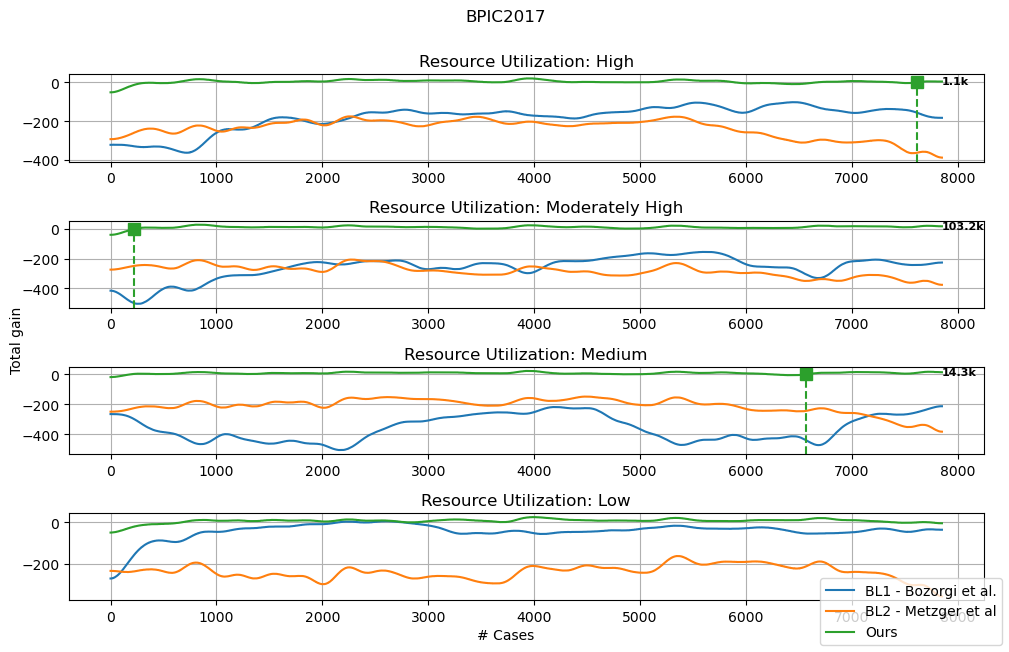

trafficFines BL1
['1', '18', '27', '55']


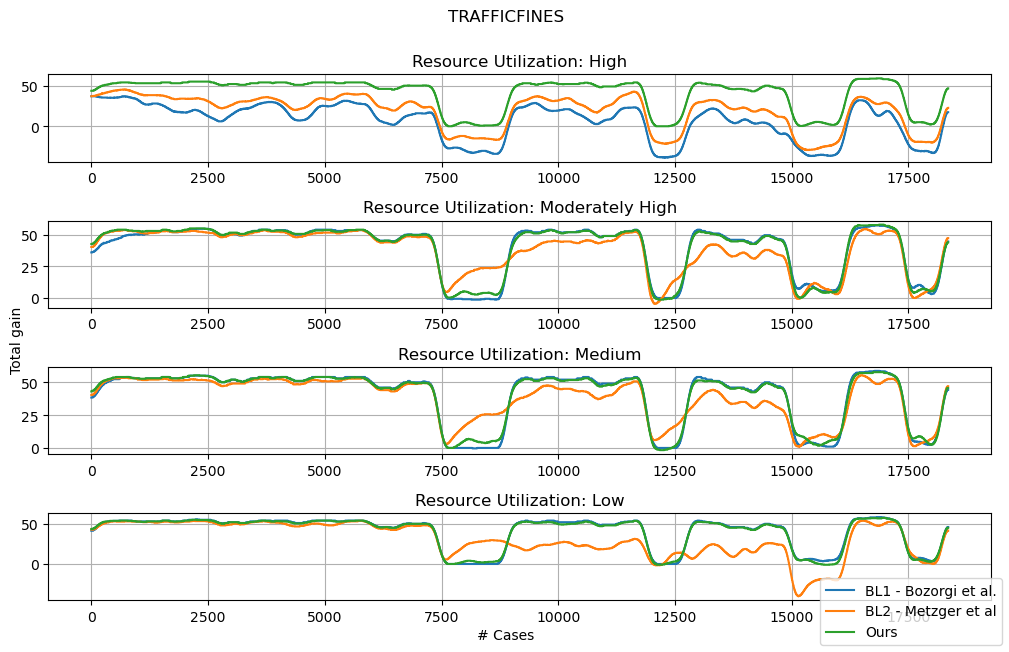

bpic2012 BL1
['1', '4', '6', '12']


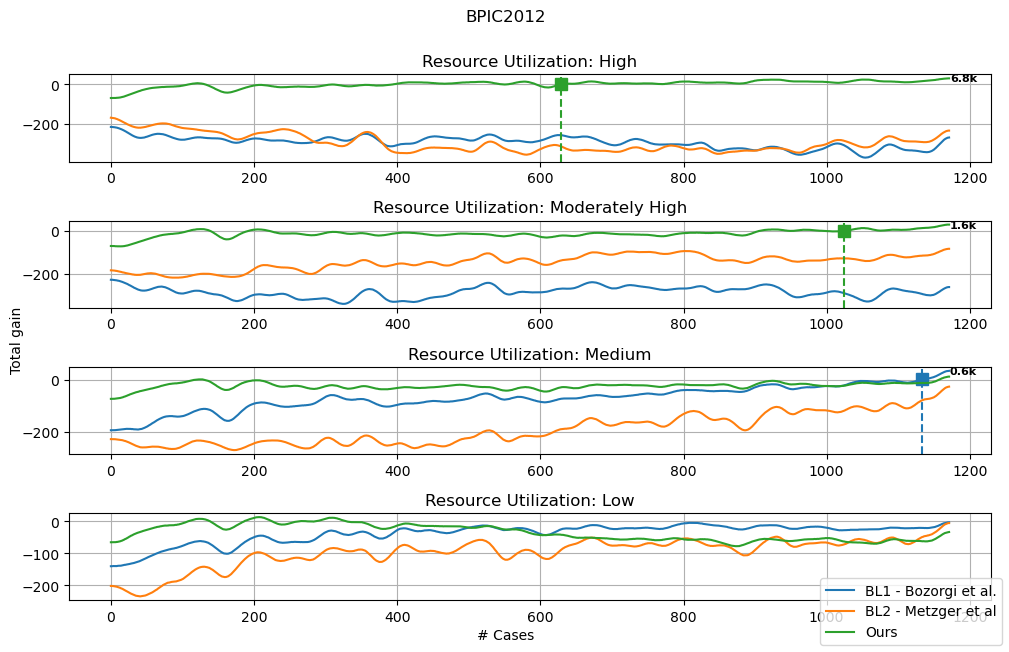

In [79]:
  #break
# Plotting
modes = ["Zahra", "Metzger", "Mahmoud"]
for dataset_name in list(set(key[0] for key in average_values.keys())):

#for dataset_name, mode in average_values.keys()[0]:
    print(dataset_name, "BL1")
    #break

    fig, axs = plt.subplots(nrows=len(average_values[(dataset_name, "Mahmoud")]), ncols=1, figsize=(10, 6))
    sorted_resource_levels = sorted_keys_comp[dataset_name]
    print(sorted_resource_levels)

    categories = ["High", "Moderately High", "Medium", "Low"]
    # Create a dictionary to map resource levels to categories
    resource_level_mapping = dict(zip(sorted_resource_levels, categories))

    mode_labels = {
        'Zahra': "BL1 - Bozorgi et al.",
        'Metzger': "BL2 - Metzger et al",
        'Mahmoud': "Ours"
    }
    from matplotlib.lines import Line2D
    legend_handles = []
    
    for idx, resource_level in enumerate(sorted_resource_levels):
        x_values, y_values, legend_labels = [], [], []
        for mode in modes:
            resources = average_values[(dataset_name, mode)]
            average_gain = resources[resource_level]
            legend_labels.append(mode_labels[mode])
            x_values.append(range(len(average_gain)))
            y_values.append(average_gain)
        # for mode, resources in average_values.items():
        #     average_gain = resources[resource_level]
        #     legend_labels.append(mode_labels[mode[1]])
        #     x_values.append(range(len(average_gain)))
        #     y_values.append(average_gain)
        
        for x, y, label in zip(x_values, y_values, legend_labels):
            line, = axs[idx].plot(x, y, label=label)  # Store the line object
            line_color = line.get_color()  # Get the color of the line
            legend_handles.append(Line2D([0], [0], color=line_color, label=label))
            
            
            if dataset_name=="trafficFines":
                continue
            else:                
                # Calculate total gain after convergence
                convergence_index = find_convergence(y)
                if convergence_index is not None:
                    total_gain = np.sum(y[convergence_index:])
                    if total_gain / 1000 < 0.2:
                        continue
                    else:
                        formatted_total_gain = f"{total_gain / 1000:.1f}k"
                        # Mark convergence point on the line with the same color
                        axs[idx].plot(x[convergence_index], y[convergence_index], marker='s', markersize=8, color=line_color)
                        text_x = x[-1] + 1
                        text_y = y[-1] + 0.1
                        axs[idx].text(text_x, text_y, f"{formatted_total_gain}", ha='left', va='center', fontsize=8, fontweight='bold')
                        axs[idx].axvline(x[convergence_index], color=line_color, linestyle='--')
                        
        
        axs[idx].set_title(f"Resource Utilization: {resource_level_mapping[resource_level]}")

        axs[idx].grid(True)
        
    fig.text(0.5, 0.0001, '# Cases', ha='center')
    fig.text(0.004, 0.5, 'Total gain', va='center', rotation='vertical')
    fig.legend(legend_handles, legend_labels, loc='lower right')
    plt.tight_layout()
    plt.suptitle(f"{dataset_name.upper()}", y=1.05)  
    fig.savefig(f"./../../Desktop/{dataset_name}.pdf")
    plt.show()
    
    



In [71]:
#for x in average_values[("bpic2012", "Zahra")]

{'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
        -271.66666667, -271.33333333]),
 '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
        -261.        , -261.        ]),
 '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
          33.33333333,   33.33333333]),
 '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
          -3.66666667,   -3.33333333])}

In [70]:
for mode, resources in average_values.items():
    print(mode, resources)
    break

('bpic2012', 'Zahra') {'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
       -271.66666667, -271.33333333]), '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
       -261.        , -261.        ]), '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
         33.33333333,   33.33333333]), '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
         -3.66666667,   -3.33333333])}


In [68]:
for resources in average_values[("bpic2012", "Zahra")]:
    print(resources)

1
4
6
12


In [66]:
dataset_name

'bpic2017'

In [67]:
mode

('bpic2012', 'Zahra')

In [65]:
average_values[(dataset_name, mode)]

KeyError: ('bpic2017', ('bpic2012', 'Zahra'))

In [58]:
for mode, resources in average_values[(dataset_name, mode)].items():
    print(mode, resources)
    break

KeyError: ('bpic2017', ('bpic2012', 'Zahra'))

In [55]:
for dataset_name, mode in list(set(key[0] for key in average_values.items())):
    print(dataset_name)

trafficFines
trafficFines
bpic2012
bpic2012
bpic2017
trafficFines
bpic2017
bpic2012
bpic2017


In [56]:
for mode, resources in average_values.items():
    print(mode, resources)
    break

('bpic2012', 'Zahra') {'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
       -271.66666667, -271.33333333]), '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
       -261.        , -261.        ]), '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
         33.33333333,   33.33333333]), '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
         -3.66666667,   -3.33333333])}


In [46]:
for mode, resources in average_values.items():
    print(mode, resources)
    

('bpic2012', 'Zahra') {'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
       -271.66666667, -271.33333333]), '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
       -261.        , -261.        ]), '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
         33.33333333,   33.33333333]), '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
         -3.66666667,   -3.33333333])}
('bpic2017', 'Zahra') {'1': array([-321.66666667, -321.66666667, -321.66666667, ..., -182.33333333,
       -182.33333333, -182.33333333]), '3': array([-417.33333333, -417.33333333, -417.33333333, ..., -227.        ,
       -227.        , -227.        ]), '4': array([-265.33333333, -265.33333333, -265.33333333, ..., -213.        ,
       -213.        , -213.        ]), '8': array([-270.66666667, -270.66666667, -270.66666667, ...,  -35.33333333,
        -35.33333333,  -35.33333333])}
('trafficFines', 'Zahra')

In [34]:
sorted_resource_levels

['1', '18', '27', '55']

In [35]:
for mode, resources in average_values.items():
    print(mode, resources)
    break

('bpic2012', 'Zahra') {'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
       -271.66666667, -271.33333333]), '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
       -261.        , -261.        ]), '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
         33.33333333,   33.33333333]), '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
         -3.66666667,   -3.33333333])}


In [30]:
average_values

{('bpic2012',
  'Zahra'): {'1': array([-217.33333333, -217.33333333, -217.66666667, ..., -272.33333333,
         -271.66666667, -271.33333333]), '4': array([-227.        , -227.33333333, -227.        , ..., -261.66666667,
         -261.        , -261.        ]), '6': array([-193.66666667, -193.66666667, -193.66666667, ...,   32.66666667,
           33.33333333,   33.33333333]), '12': array([-140.66666667, -140.66666667, -140.33333333, ...,   -3.66666667,
           -3.66666667,   -3.33333333])},
 ('bpic2017',
  'Zahra'): {'1': array([-321.66666667, -321.66666667, -321.66666667, ..., -182.33333333,
         -182.33333333, -182.33333333]), '3': array([-417.33333333, -417.33333333, -417.33333333, ..., -227.        ,
         -227.        , -227.        ]), '4': array([-265.33333333, -265.33333333, -265.33333333, ..., -213.        ,
         -213.        , -213.        ]), '8': array([-270.66666667, -270.66666667, -270.66666667, ...,  -35.33333333,
          -35.33333333,  -35.33333333])},

In [31]:
dataset_names = list(set(key[0] for key in average_values.keys()))
dataset_names

['bpic2017', 'trafficFines', 'bpic2012']

In [7]:
average_values.keys()

dict_keys([('bpic2012', 'Zahra'), ('bpic2012', 'Metzger'), ('bpic2012', 'Mahmoud')])

In [16]:
for k, v in average_values.items():
    print(k[0])
    print(k[1])
    break

bpic2012
Zahra


In [6]:
average_values[("bpic2012", mode)]

{'1': array([-69.66666667, -69.66666667, -69.66666667, ...,  30.66666667,
         30.66666667,  30.66666667]),
 '4': array([-69.66666667, -69.66666667, -69.66666667, ...,  30.        ,
         30.        ,  30.        ]),
 '6': array([-73.66666667, -73.66666667, -73.66666667, ...,  11.        ,
         11.33333333,  11.33333333]),
 '12': array([-65.66666667, -65.66666667, -65.66666667, ..., -34.33333333,
        -34.        , -33.66666667])}

In [22]:
# modes_map = {"Zahra": "BL1", "Metzger": "BL2", "Mahmoud": "ours"}
# iterations = [1, 2, 3]
# datasets = ["bpic2012"]
# for mode, mode_alias in modes_map.items():
#     for dataset_name in datasets:        
#         for it in iterations:    
#             print(it, mode_alias)
#             path = f"/home/mshoush/5th/RL-prescriptive-monitoring/resultsRevision_from_vm/final_results/{dataset_name}/{dataset_name}/resultsRL/all/{mode_alias}{it}/"
#             all_files = os.listdir(path)    
#             csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))

          
            
#     break

1 BL1
2 BL1
3 BL1


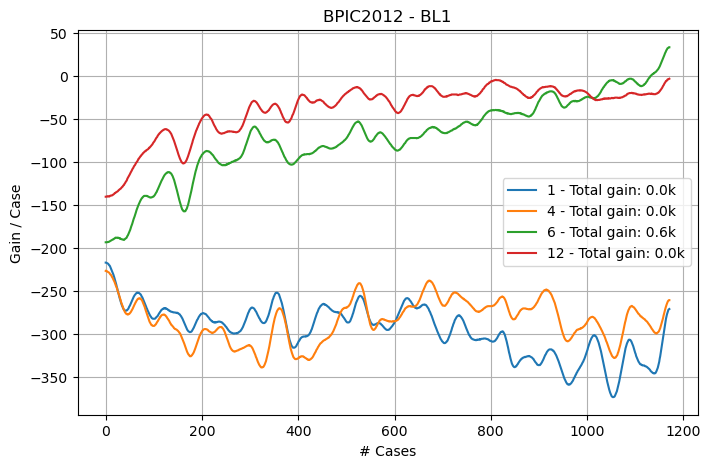

1 BL2
2 BL2
3 BL2


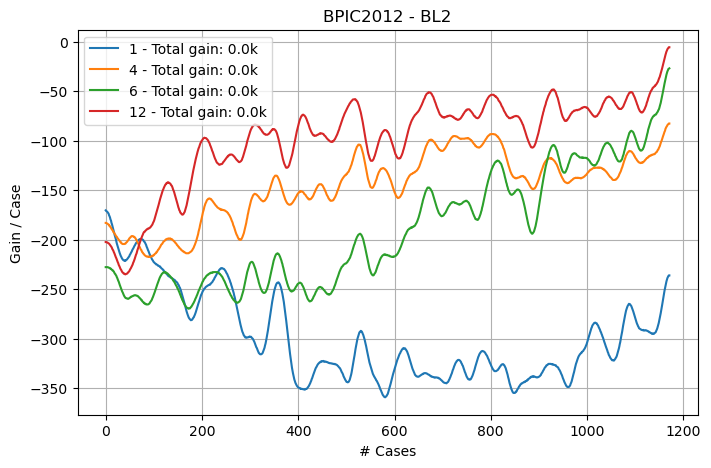

1 ours
2 ours
3 ours


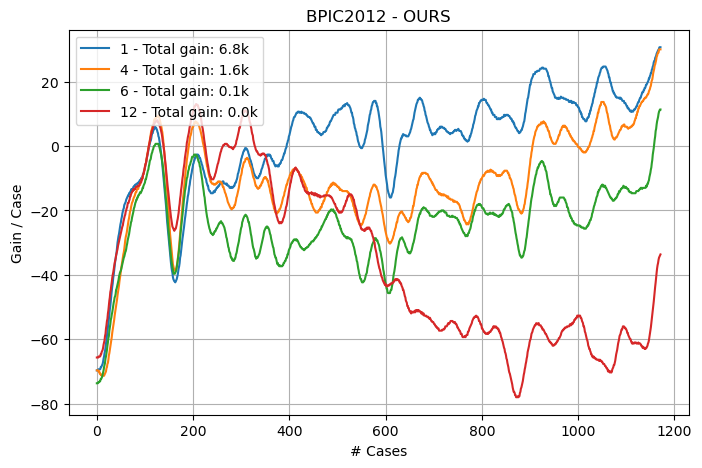

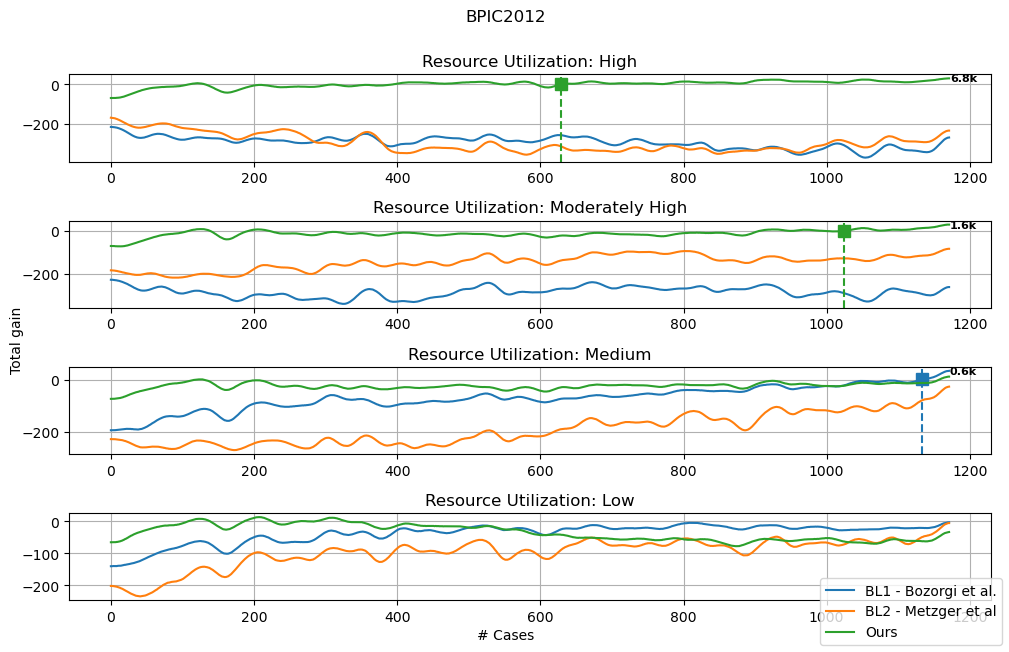

In [2]:
import os

def find_convergence(arr):
    convergence_point = None
    for i, value in enumerate(arr):
        if value > 0:
            if all(v > 0 for v in arr[i:]):
                convergence_point = i
                break
    return convergence_point

# Define modes and their aliases
modes_map = {"Zahra": "BL1", "Metzger": "BL2", "Mahmoud": "ours"}

# Define iterations and datasets
iterations = [1, 2, 3]
datasets = ["bpic2012"]

dfs_dict = {}  # {it: [dfs]}
gains_dict = {}

convergence_dict_comp = {}
average_values = {}

# Iterate over modes, datasets, and iterations
for mode, mode_alias in modes_map.items():
    convergence_dict_comp[mode] = {}
    average_values[mode] = {}
    for dataset_name in datasets:  
        if dataset_name == "bpic2012":
            sig = 12
        else:
            sig = 100   
           
        for it in iterations:    
            gains_dict[it] = {}
            dfs_dict[it] = []
            print(it, mode_alias)
            # final_results_v2 -  final_results (bls: 0, ours: 10) - resultsRevisionGainRes_0 - resultsRevisionGainRes_10
            path = f"/home/mshoush/5th/RL-prescriptive-monitoring/resultsRevision_from_vm/final_results_v2/{dataset_name}/{dataset_name}/resultsRL/all/{mode_alias}{it}/"
            
            # Retrieve all CSV files from subfolders within the path
            csv_files = []
            for root, dirs, files in os.walk(path):
                for file in files:
                    if file.endswith(".csv"):
                        csv_files.append(os.path.join(root, file))
        
                        
            
            # Print the list of CSV files
            for f in csv_files:
                df = pd.read_csv(f, sep=";")
                df.name = os.path.basename(f).split("_")[2]
                dfs_dict[it].append((df.name , df))
                gains_dict[it][df.name] = []

        
        for k, v in dfs_dict.items():
            it = k
            for df_name, df in v:
                
                gains_dict[it][df_name].append(gaussian_filter1d(df.gain, sigma=sig))
        combined_dict = {}

        for k, v in gains_dict.items():
            for key, value in v.items():
                combined_dict.setdefault(key, []).extend(value)
        
        gains = {}
        sum_gaines = {}
        avg_gaines = {}
        for k, v in combined_dict.items():
            gains[k] = np.mean(v, axis=0)
            sum_gaines[k] = sum(gains[k])
            avg_gaines[k] = np.mean(gains[k])
            
        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)
    
        
        # Convert keys to integers and sort them
        sorted_keys = sorted(gains.keys(), key=lambda x: int(x))
        
        
        # Create a new dictionary with sorted keys
        gains = {k: gains[k] for k in sorted_keys}



        for k, arr in gains.items():
            convergence_dict_comp[mode][k] = []

            convergence_index = find_convergence(arr)
            if convergence_index is None:
                # print(f"Array {k} does not converge")
                convergence_dict_comp[mode][k].append([0, 0])
                sum_after_convergence = 0

            else:
                # print(f"Array {k} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(arr[convergence_index:])
                #print(f"Sum after convergence: {sum_after_convergence}")
                convergence_dict_comp[mode][k].append(
                    [convergence_index, sum_after_convergence]
                )
            # print(" Total gain: {:.1f}k\n".format(sum_after_convergence / 1000))
            plt.plot(
                    arr,
                    label= str(k)
                    + " - Total gain: {:.1f}k".format(sum_after_convergence / 1000),
                )

        from matplotlib.ticker import FuncFormatter

        formatter = FuncFormatter(millions)
        plt.grid(True)
        plt.legend(loc="best")
        plt.ylabel("Gain / Case")
        plt.xlabel("# Cases")
        if dataset_name=="traficFines":
            d = "trafficFines"
            plt.title(f"{d.upper()} - {mode_alias.upper()}")
        else:
            plt.title(f"{dataset_name.upper()} - {mode_alias.upper()}")
        plt.show()
        average_values[mode]=gains
        # fig, axs = plt.subplots(nrows=len(average_values[mode]), ncols=1, figsize=(10, 6))
        # sorted_resource_levels = sorted_keys


    #break
# Plotting
fig, axs = plt.subplots(nrows=len(average_values[mode]), ncols=1, figsize=(10, 6))
sorted_resource_levels = sorted_keys

categories = ["High", "Moderately High", "Medium", "Low"]
# Create a dictionary to map resource levels to categories
resource_level_mapping = dict(zip(sorted_resource_levels, categories))

mode_labels = {
    'Zahra': "BL1 - Bozorgi et al.",
    'Metzger': "BL2 - Metzger et al",
    'Mahmoud': "Ours"
}

for idx, resource_level in enumerate(sorted_resource_levels):
    x_values, y_values, legend_labels = [], [], []
    for mode, resources in average_values.items():
        average_gain = resources[resource_level]
        legend_labels.append(mode_labels[mode])
        x_values.append(range(len(average_gain)))
        y_values.append(average_gain)
    
    for x, y, label in zip(x_values, y_values, legend_labels):
        line, = axs[idx].plot(x, y, label=label)  # Store the line object
        line_color = line.get_color()  # Get the color of the line
        
        # Calculate total gain after convergence
        convergence_index = find_convergence(y)
        if convergence_index is not None:
            total_gain = np.sum(y[convergence_index:])
            if total_gain / 1000 < 0.2:
                continue
            else:
                formatted_total_gain = f"{total_gain / 1000:.1f}k"
                # Mark convergence point on the line with the same color
                axs[idx].plot(x[convergence_index], y[convergence_index], marker='s', markersize=8, color=line_color)
                text_x = x[-1] + 1
                text_y = y[-1] + 0.1
                axs[idx].text(text_x, text_y, f"{formatted_total_gain}", ha='left', va='center', fontsize=8, fontweight='bold')
                axs[idx].axvline(x[convergence_index], color=line_color, linestyle='--')
                
    
    axs[idx].set_title(f"Resource Utilization: {resource_level_mapping[resource_level]}")

    axs[idx].grid(True)
    
fig.text(0.5, 0.0001, '# Cases', ha='center')
fig.text(0.004, 0.5, 'Total gain', va='center', rotation='vertical')
fig.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.suptitle(f"{dataset_name.upper()}", y=1.05)  
plt.show()



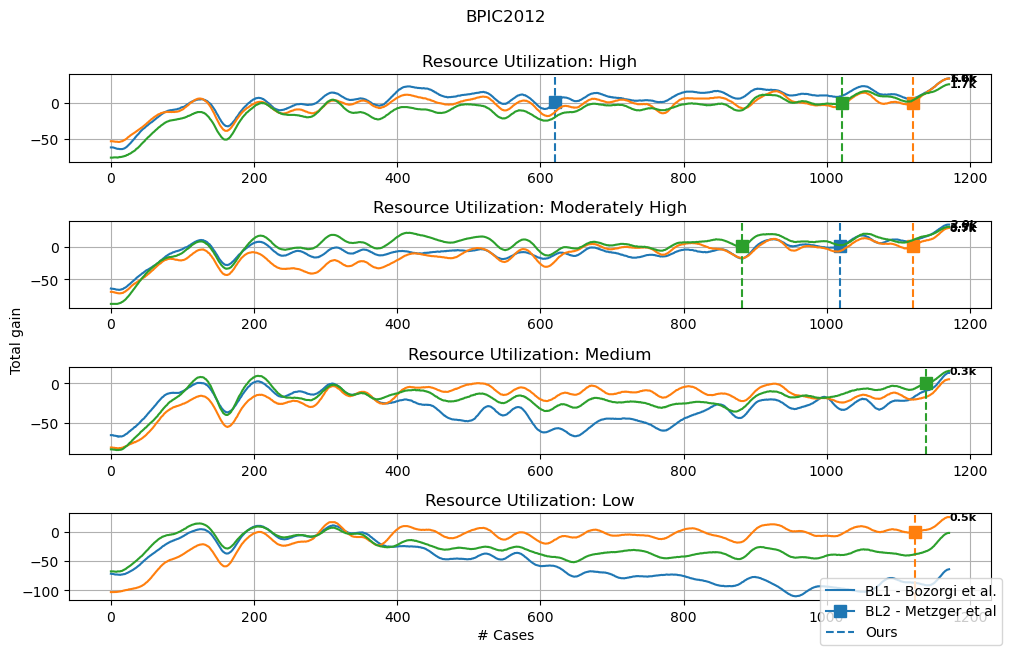

In [24]:
# Plotting
fig, axs = plt.subplots(nrows=len(average_values[mode]), ncols=1, figsize=(10, 6))
sorted_resource_levels = sorted_keys

categories = ["High", "Moderately High", "Medium", "Low"]
# Create a dictionary to map resource levels to categories
resource_level_mapping = dict(zip(sorted_resource_levels, categories))

mode_labels = {
    'Zahra': "BL1 - Bozorgi et al.",
    'Metzger': "BL2 - Metzger et al",
    'Mahmoud': "Ours"
}

for idx, resource_level in enumerate(sorted_resource_levels):
    x_values, y_values, legend_labels = [], [], []
    for mode, resources in average_values.items():
        average_gain = resources[resource_level]
        legend_labels.append(mode_labels[mode])
        x_values.append(range(len(average_gain)))
        y_values.append(average_gain)
    
    for x, y, label in zip(x_values, y_values, legend_labels):
        line, = axs[idx].plot(x, y, label=label)  # Store the line object
        line_color = line.get_color()  # Get the color of the line
        
        # Calculate total gain after convergence
        convergence_index = find_convergence(y)
        if convergence_index is not None:
            total_gain = np.sum(y[convergence_index:])
            if total_gain / 1000 < 0.2:
                continue
            else:
                formatted_total_gain = f"{total_gain / 1000:.1f}k"
                # Mark convergence point on the line with the same color
                axs[idx].plot(x[convergence_index], y[convergence_index], marker='s', markersize=8, color=line_color)
                text_x = x[-1] + 1
                text_y = y[-1] + 0.1
                axs[idx].text(text_x, text_y, f"{formatted_total_gain}", ha='left', va='center', fontsize=8, fontweight='bold')
                axs[idx].axvline(x[convergence_index], color=line_color, linestyle='--')
                
    
    axs[idx].set_title(f"Resource Utilization: {resource_level_mapping[resource_level]}")

    axs[idx].grid(True)
    
fig.text(0.5, 0.0001, '# Cases', ha='center')
fig.text(0.004, 0.5, 'Total gain', va='center', rotation='vertical')
fig.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.suptitle(f"{dataset_name.upper()}", y=1.05)  
plt.show()
